## Import some 'braries

In [49]:
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from vaderSentiment import vaderSentiment as vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_columns = 999
from imblearn.over_sampling import SMOTE
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

## Data Importation and Cleaning

In [78]:
df = pd.read_excel('Restaurant_1.xlsx')

In [79]:
rv = pd.read_excel('yelp_reviews.xlsx')

In [80]:
nw = pd.read_excel('Data-Collection/Restaurant_2.xlsx')

In [81]:
rw = pd.read_excel('Data-Collection/yelp_reviews_2.xlsx')

In [25]:
nw.head()

,Unnamed: 0,restaurant_id,restaurant_name,price,rating,review_count
0,0,wnyX_yg4ddSDkupwFKftIA,Bonafini,$$,4.0,328
1,1,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,NaN,5.0,28
2,2,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,NaN,4.5,59
3,3,x_YWFkTcxEu1lo8Nlrog5A,Milk & Honey Cafe,$$,4.0,925
4,4,mxDfu4bHwSXoCr3FRpyMsw,L'Antagoniste,$$$,4.5,267


In [82]:
df.drop(columns='Unnamed: 0', inplace=True)
rv.drop(columns='Unnamed: 0', inplace=True)
nw.drop(columns='Unnamed: 0', inplace=True)
rw.drop(columns='Unnamed: 0', inplace=True)
rv.rename(columns={'Restaurant_Id':'restaurant_id'}, inplace=True)
rw.rename(columns={'Restaurant_Id':'restaurant_id'}, inplace=True)

In [83]:
newlist = df.merge(rv, how='left', on="restaurant_id")
newnewlist = nw.merge(rw, how='left', on="restaurant_id")
newlist.drop(columns='review_count', inplace=True)
newnewlist.drop(columns='review_count', inplace=True)

In [8]:
newnewlist.head()

,restaurant_id,restaurant_name,price,rating,review_1,review_2,review_3,review_4,review_5,review_6,review_7,review_8,review_9,review_10,review_11,review_12,review_13,review_14,review_15,review_16,review_17,review_18,review_19,review_20
0,wnyX_yg4ddSDkupwFKftIA,Bonafini,$$,4.0,This place is absolutely AMAZING!!! Came here ...,Came here for a late lunch and was generally h...,"Bonafini is just alright, in my opinion. I pro...",Delicious food. Great atmosphere. Prompt and f...,Everything you've heard about this place is tr...,Was dreaming about going to this this place an...,Bonafini makes my heart melt every time I walk...,Bonafini is a charming little restaurant in PL...,Despite being one of the few Italian restauran...,"Now called ""Bonafini"", the former ""Blessings ...",I didn't have expectations coming here but the...,So it's just like your Mom said - breakfast is...,Great brunch! Get the blueberry pancakes (fres...,Food took forever to come out & was just okay....,Such a cute little Italian restaurant! I came ...,Good brunch!!!! Very heavy avocado on the avoc...,Blessings on blessings. Blessings Cafe is in a...,A cute cafe to go to for brunch on the weekend...,Came here for lunch on a weekday with some gir...,Delicious food and friendly service. They did ...
1,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,NaN,5.0,"Nice place, good food, excellent service and c...",Good service nice environmentGood drinksI don'...,I love it here! This restaurant Is run by some...,"Great great cocktails, and super friendly staf...",When serious chefs collide to create a Souther...,Just wow! I had dinner here with a friend last...,"4 stars for me . Great atmosphere , staff was ...",So I stumbled into The Ryerson on my walk back...,Went back with my best friend last night for d...,What a lovely addition to the neighborhood? I ...,"Amazing place, good low key music, great cockt...",New restaurant so my partner and I decided to ...,"Great vibes. Good food! Bartender Andrew, was ...",My son and I went here based on a review from ...,We were here for an event so had the amazing o...,What a fantastic take on fried chicken! My sis...,"Innovative cocktails, delicious bites, super f...","Great staff, very friendly. Max greats you at ...",I loved this place! The staff was amazing. The...,I thought the food was generally good. A mod ...
2,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,NaN,4.5,I was very impressed with their food on my fir...,It is nice to see another Thai restaurant on 7...,I always am down to check out highly-reviewed ...,Dangerously good food here! The kind where if ...,Pretty good Thai spot. Flavors are good. I hav...,Born in Asía.. Thai food is in my blood. It's ...,I'm so excited to have a solid Thai place in t...,Great addition to the Park Slope neighborhood....,"Delightful addition to the neighborhood, incre...",It's a boisterous hangout for the gang after a...,Nice Thai place with lots of character and gre...,Excellent food in a comfortable setting ! The ...,When I learned that there would be a new Thai ...,Stopped by for takeout lunch. Ordered the spag...,Ate here the other night with friends and was ...,"Food is authentic, fresh and tasty. No complai...",Great addition to the neighborhood! I love lov...,Very fresh new restaurant that has three seati...,Finally! A neighborhood spot that is not posin...,"Cute ""Thai style"" decor, Great service but the..."
3,x_YWFkTcxEu1lo8Nlrog5A,Milk & Honey Cafe,$$,4.0,Love love love this place. Come here at least ...,No Milk and Definitely No Honey. We arrived f...,Tl;dr up front because this will be long: Too ...,Zero star... Worst brunch ever! The waiters an...,I have had this adorable looking cafe bookmark...,Honestly this place would be 5 stars for me if...,Honestly I am so disappointed with this visit ...,This place is one of my favorite brunch place ...,A charming brunch place in a quiet part of Bro...,Milk & Honey Cafe is a cool little order at th...,Really amazing brunch menu in a nice quiet nei.

In [84]:
newnewlist.isnull().sum()

restaurant_id        0
restaurant_name      0
price              142
rating               0
review_1           125
review_2           126
review_3           128
review_4           128
review_5           133
review_6           136
review_7           142
review_8           144
review_9           145
review_10          149
review_11          153
review_12          157
review_13          162
review_14          166
review_15          168
review_16          173
review_17          178
review_18          182
review_19          188
review_20          193
dtype: int64

In [ ]:
newnewlist.head()

In [85]:
frames = [newlist, newnewlist]

In [86]:
finalist = pd.concat(frames)

In [11]:
finalist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 24 columns):
restaurant_id      2000 non-null object
restaurant_name    2000 non-null object
price              1781 non-null object
rating             2000 non-null float64
review_1           1831 non-null object
review_2           1833 non-null object
review_3           1831 non-null object
review_4           1832 non-null object
review_5           1826 non-null object
review_6           1823 non-null object
review_7           1817 non-null object
review_8           1813 non-null object
review_9           1810 non-null object
review_10          1808 non-null object
review_11          1803 non-null object
review_12          1799 non-null object
review_13          1793 non-null object
review_14          1792 non-null object
review_15          1790 non-null object
review_16          1783 non-null object
review_17          1777 non-null object
review_18          1773 non-null object
review_19    

In [87]:
finalist.dropna(axis=0, how='any',inplace=True)

In [31]:
#finalist.to_csv('finallist.csv')

In [88]:
finalist.isnull().sum()

restaurant_id      0
restaurant_name    0
price              0
rating             0
review_1           0
review_2           0
review_3           0
review_4           0
review_5           0
review_6           0
review_7           0
review_8           0
review_9           0
review_10          0
review_11          0
review_12          0
review_13          0
review_14          0
review_15          0
review_16          0
review_17          0
review_18          0
review_19          0
review_20          0
dtype: int64

In [36]:
finalist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 999
Data columns (total 20 columns):
review_1     1625 non-null object
review_2     1625 non-null object
review_3     1625 non-null object
review_4     1625 non-null object
review_5     1625 non-null object
review_6     1625 non-null object
review_7     1625 non-null object
review_8     1625 non-null object
review_9     1625 non-null object
review_10    1625 non-null object
review_11    1625 non-null object
review_12    1625 non-null object
review_13    1625 non-null object
review_14    1625 non-null object
review_15    1625 non-null object
review_16    1625 non-null object
review_17    1625 non-null object
review_18    1625 non-null object
review_19    1625 non-null object
review_20    1625 non-null object
dtypes: object(20)
memory usage: 266.6+ KB


### Dividing Target from Features

In [89]:
labels = finalist.rating

In [90]:
finalist.drop(columns=['restaurant_id', 'restaurant_name', 'rating'], inplace=True)

In [91]:
analyzer = SentimentIntensityAnalyzer()

In [92]:
pd.DataFrame(labels).to_csv('labels.csv')

## Vaderizin'

In [93]:
#prepping list for Vader loops
vad = ['review_vader_'+ str(x+1) for x in range(20)]
lis = ['features'+str(x+1) for x in range(20)]
nums = [x for x in range(1,21)]
rva = ['review_'+ str(x+1) for x in range(20)]

In [94]:
#Vaderizn'
for j in tqdm(nums):
    lis[j-1] = finalist[rva[j-1]].apply(lambda x: analyzer.polarity_scores(x)).apply(pd.Series)
    finalist = pd.concat([finalist,lis[j-1].apply(pd.Series)],1)
    finalist.rename(columns={'neg': 'neg'+str(j), 'neu': 'neu'+str(j), 'pos': 'pos'+str(j), 'compound': 'compound'+str(j)}, inplace=True)
        
        

100%|██████████| 20/20 [02:23<00:00,  7.57s/it]


In [113]:
finalist.price.replace({'$': 1, "$$":2, "$$$": 3, "$$$$": 4}, inplace=True)

In [104]:
#save to csv to avoid doing more work
finalist.to_csv('vaderized.csv')

In [40]:
#nl = pd.read_csv('vaderized.csv')

In [41]:
#nl.head()

,Unnamed: 0,review_1,review_2,review_3,review_4,review_5,review_6,review_7,review_8,review_9,review_10,review_11,review_12,review_13,review_14,review_15,review_16,review_17,review_18,review_19,review_20,neg1,neu1,pos1,compound1,neg2,neu2,pos2,compound2,neg3,neu3,pos3,compound3,neg4,neu4,pos4,compound4,neg5,neu5,pos5,compound5,neg6,neu6,pos6,compound6,neg7,neu7,pos7,compound7,neg8,neu8,pos8,compound8,neg9,neu9,pos9,compound9,neg10,neu10,pos10,compound10,neg11,neu11,pos11,compound11,neg12,neu12,pos12,compound12,neg13,neu13,pos13,compound13,neg14,neu14,pos14,compound14,neg15,neu15,pos15,compound15,neg16,neu16,pos16,compound16,neg17,neu17,pos17,compound17,neg18,neu18,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
0,0,Had a reservation on Saturday night for dinner...,Came here on a Friday night around 6:30pm and ...,Oh my goodness where do I even start? My boyfr...,"Unfortunately, dinner here was pretty disappoi...","This place is overrated, i would give only 2 s...","I've been here twice and both times, I was pre...",Great place. The waiter was extremely helpful ...,This place is an affordable gem! Perfect for a...,After hearing tons of people rave about this s...,Great seafood restaurant that is great value f...,Quick recap: come here if you like seafood. Or...,An unheard of trifecta: Cheap. Great tasting. ...,Sat at the bar and ordered the scallops with m...,"This is a cute spot to go to, especially for a...","Upstate specializes in seafood, and it's a ver...",I got here early with my SO on a Friday evenin...,"Okay, so Upstate does not need a review from m...",I've been meaning to try this place out for th...,I am so disappointed. Upstate has been on my l...,Waking into Upstate you think it's a small hol...,0.000,0.747,0.253,0.9652,0.000,0.692,0.308,0.9806,0.000,0.777,0.223,0.9862,0.085,0.769,0.146,0.9573,0.068,0.881,0.051,-0.3834,0.030,0.765,0.205,0.9814,0.033,0.585,0.381,0.9775,0.035,0.785,0.180,0.9928,0.051,0.732,0.217,0.9900,0.035,0.458,0.507,0.9833,0.021,0.722,0.257,0.9794,0.014,0.709,0.276,0.9989,0.000,0.826,0.174,0.9723,0.000,0.584,0.416,0.9899,0.030,0.735,0.234,0.9989,0.021,0.783,0.195,0.9817,0.023,0.820,0.157,0.8908,0.025,0.861,0.114,0.9166,0.035,0.754,0.211,0.9978,0.052,0.776,0.172,0.9914
1,1,The food and drinks here are both delicious. W...,My boyfriend took me here for my birthday earl...,We came for our anniversary dinner. I got the ...,Came here for a light dinner with my friend an...,Amelie is a lively wine bar with with cheese a...,This was my second time I visited the place. T...,I am simply in love. This has become my new fa...,- One of my favourite French restaurants in ny...,It really tasted like the last week of summer....,Meh. Pretty good. Middle of the road classic F...,I feel like it is very difficult to find a goo...,The happy hour deal can't be beat - wine fligh...,"This place is the BOMB!!! Eric, the manager, ...",Got my first wine flight here and I was not di...,I was in the area today and looked on yelp for...,Truly enjoyed our dining experience at Amelie....,We will be back again and again - we just had ...,"I just love this French place. I feel home, si...","This French wine bar is such a cozy spot, even...",My girlfriend took me here for my birthday din...,0.019,0.736,0.244,0.9762,0.038,0.734,0.228,0.9965,0.028,0.695,0.277,0.9956,0.000,0.557,0.443,0.9787,0.062,0.606,0.332,0.9765,0.078,0.743,0.179,0.9337,0.000,0.802,0.198,0.9950,0.000,0.836,0.164,0.9230,0.000,0.674,0.326,0.9789,0.031,0.738,0.231,0.8126,0.074,0.594,0.332,0.9956,0.020,0.702,0.278,0.9648,0.000,0.687,0.313,0.9753,0.021,0.627,0.352,0.9973,0.048,0.797,0.155,0.9277,0.040,0.770,0.190,0.9796,0.021,0.711,0.268,0.9938,0.000,0.599,0.401,0.9406,0.000,0.765,0.235,0.9861,0.049,0.802,0.149,0.9490
2,2,Was here with my boyfriend one Sunday evening ...,My friend and I checked out LoveMama around 6p...,We were vacationing in New York and found this...,This place is PACKED on a Friday night. Don't ...,Very cheap quality Thai

In [42]:
#nl.drop(columns=['Unnamed: 0'])

,review_1,review_2,review_3,review_4,review_5,review_6,review_7,review_8,review_9,review_10,review_11,review_12,review_13,review_14,review_15,review_16,review_17,review_18,review_19,review_20,neg1,neu1,pos1,compound1,neg2,neu2,pos2,compound2,neg3,neu3,pos3,compound3,neg4,neu4,pos4,compound4,neg5,neu5,pos5,compound5,neg6,neu6,pos6,compound6,neg7,neu7,pos7,compound7,neg8,neu8,pos8,compound8,neg9,neu9,pos9,compound9,neg10,neu10,pos10,compound10,neg11,neu11,pos11,compound11,neg12,neu12,pos12,compound12,neg13,neu13,pos13,compound13,neg14,neu14,pos14,compound14,neg15,neu15,pos15,compound15,neg16,neu16,pos16,compound16,neg17,neu17,pos17,compound17,neg18,neu18,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
0,Had a reservation on Saturday night for dinner...,Came here on a Friday night around 6:30pm and ...,Oh my goodness where do I even start? My boyfr...,"Unfortunately, dinner here was pretty disappoi...","This place is overrated, i would give only 2 s...","I've been here twice and both times, I was pre...",Great place. The waiter was extremely helpful ...,This place is an affordable gem! Perfect for a...,After hearing tons of people rave about this s...,Great seafood restaurant that is great value f...,Quick recap: come here if you like seafood. Or...,An unheard of trifecta: Cheap. Great tasting. ...,Sat at the bar and ordered the scallops with m...,"This is a cute spot to go to, especially for a...","Upstate specializes in seafood, and it's a ver...",I got here early with my SO on a Friday evenin...,"Okay, so Upstate does not need a review from m...",I've been meaning to try this place out for th...,I am so disappointed. Upstate has been on my l...,Waking into Upstate you think it's a small hol...,0.000,0.747,0.253,0.9652,0.000,0.692,0.308,0.9806,0.000,0.777,0.223,0.9862,0.085,0.769,0.146,0.9573,0.068,0.881,0.051,-0.3834,0.030,0.765,0.205,0.9814,0.033,0.585,0.381,0.9775,0.035,0.785,0.180,0.9928,0.051,0.732,0.217,0.9900,0.035,0.458,0.507,0.9833,0.021,0.722,0.257,0.9794,0.014,0.709,0.276,0.9989,0.000,0.826,0.174,0.9723,0.000,0.584,0.416,0.9899,0.030,0.735,0.234,0.9989,0.021,0.783,0.195,0.9817,0.023,0.820,0.157,0.8908,0.025,0.861,0.114,0.9166,0.035,0.754,0.211,0.9978,0.052,0.776,0.172,0.9914
1,The food and drinks here are both delicious. W...,My boyfriend took me here for my birthday earl...,We came for our anniversary dinner. I got the ...,Came here for a light dinner with my friend an...,Amelie is a lively wine bar with with cheese a...,This was my second time I visited the place. T...,I am simply in love. This has become my new fa...,- One of my favourite French restaurants in ny...,It really tasted like the last week of summer....,Meh. Pretty good. Middle of the road classic F...,I feel like it is very difficult to find a goo...,The happy hour deal can't be beat - wine fligh...,"This place is the BOMB!!! Eric, the manager, ...",Got my first wine flight here and I was not di...,I was in the area today and looked on yelp for...,Truly enjoyed our dining experience at Amelie....,We will be back again and again - we just had ...,"I just love this French place. I feel home, si...","This French wine bar is such a cozy spot, even...",My girlfriend took me here for my birthday din...,0.019,0.736,0.244,0.9762,0.038,0.734,0.228,0.9965,0.028,0.695,0.277,0.9956,0.000,0.557,0.443,0.9787,0.062,0.606,0.332,0.9765,0.078,0.743,0.179,0.9337,0.000,0.802,0.198,0.9950,0.000,0.836,0.164,0.9230,0.000,0.674,0.326,0.9789,0.031,0.738,0.231,0.8126,0.074,0.594,0.332,0.9956,0.020,0.702,0.278,0.9648,0.000,0.687,0.313,0.9753,0.021,0.627,0.352,0.9973,0.048,0.797,0.155,0.9277,0.040,0.770,0.190,0.9796,0.021,0.711,0.268,0.9938,0.000,0.599,0.401,0.9406,0.000,0.765,0.235,0.9861,0.049,0.802,0.149,0.9490
2,Was here with my boyfriend one Sunday evening ...,My friend and I checked out LoveMama around 6p...,We were vacationing in New York and found this...,This place is PACKED on a Friday night. Don't ...,Very cheap quality Thai food! The food w

## EDA'in!

In [97]:
nva = finalist.drop(columns=rva)

In [20]:
nva.head(15)

,neg1,neu1,pos1,compound1,neg2,neu2,pos2,compound2,neg3,neu3,pos3,compound3,neg4,neu4,pos4,compound4,neg5,neu5,pos5,compound5,neg6,neu6,pos6,compound6,neg7,neu7,pos7,compound7,neg8,neu8,pos8,compound8,neg9,neu9,pos9,compound9,neg10,neu10,pos10,compound10,neg11,neu11,pos11,compound11,neg12,neu12,pos12,compound12,neg13,neu13,pos13,compound13,neg14,neu14,pos14,compound14,neg15,neu15,pos15,compound15,neg16,neu16,pos16,compound16,neg17,neu17,pos17,compound17,neg18,neu18,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
0,0.000,0.747,0.253,0.9652,0.000,0.692,0.308,0.9806,0.000,0.777,0.223,0.9862,0.085,0.769,0.146,0.9573,0.068,0.881,0.051,-0.3834,0.030,0.765,0.205,0.9814,0.033,0.585,0.381,0.9775,0.035,0.785,0.180,0.9928,0.051,0.732,0.217,0.9900,0.035,0.458,0.507,0.9833,0.021,0.722,0.257,0.9794,0.014,0.709,0.276,0.9989,0.000,0.826,0.174,0.9723,0.000,0.584,0.416,0.9899,0.030,0.735,0.234,0.9989,0.021,0.783,0.195,0.9817,0.023,0.820,0.157,0.8908,0.025,0.861,0.114,0.9166,0.035,0.754,0.211,0.9978,0.052,0.776,0.172,0.9914
1,0.019,0.736,0.244,0.9762,0.038,0.734,0.228,0.9965,0.028,0.695,0.277,0.9956,0.000,0.557,0.443,0.9787,0.062,0.606,0.332,0.9765,0.078,0.743,0.179,0.9337,0.000,0.802,0.198,0.9950,0.000,0.836,0.164,0.9230,0.000,0.674,0.326,0.9789,0.031,0.738,0.231,0.8126,0.074,0.594,0.332,0.9956,0.020,0.702,0.278,0.9648,0.000,0.687,0.313,0.9753,0.021,0.627,0.352,0.9973,0.048,0.797,0.155,0.9277,0.040,0.770,0.190,0.9796,0.021,0.711,0.268,0.9938,0.000,0.599,0.401,0.9406,0.000,0.765,0.235,0.9861,0.049,0.802,0.149,0.9490
2,0.033,0.858,0.110,0.9504,0.035,0.755,0.210,0.9966,0.013,0.835,0.152,0.9153,0.040,0.811,0.149,0.8979,0.040,0.826,0.133,0.8348,0.010,0.756,0.233,0.9978,0.069,0.705,0.227,0.9559,0.011,0.864,0.124,0.8731,0.000,0.884,0.116,0.4404,0.026,0.810,0.164,0.9975,0.055,0.810,0.135,0.8935,0.039,0.769,0.192,0.9866,0.024,0.842,0.134,0.9451,0.015,0.791,0.195,0.9781,0.034,0.795,0.171,0.9542,0.044,0.793,0.164,0.9708,0.000,0.640,0.360,0.8402,0.006,0.771,0.222,0.9888,0.094,0.704,0.203,0.4186,0.000,0.844,0.156,0.9758
3,0.000,0.471,0.529,0.9583,0.017,0.699,0.283,0.9920,0.000,0.667,0.333,0.9866,0.056,0.790,0.154,0.9360,0.034,0.890,0.077,0.5079,0.058,0.792,0.150,0.9700,0.016,0.808,0.176,0.9692,0.019,0.828,0.153,0.9810,0.067,0.672,0.261,0.8951,0.063,0.821,0.116,0.9189,0.039,0.868,0.093,0.7996,0.028,0.874,0.098,0.9329,0.020,0.704,0.277,0.9898,0.080,0.777,0.143,0.8545,0.000,0.542,0.458,0.9451,0.030,0.809,0.161,0.8551,0.156,0.655,0.189,0.0926,0.094,0.855,0.051,-0.5517,0.000,0.771,0.229,0.9792,0.013,0.833,0.154,0.9831
4,0.000,0.644,0.356,0.9371,0.000,0.685,0.315,0.9705,0.046,0.895,0.058,0.3862,0.018,0.822,0.160,0.9836,0.046,0.801,0.153,0.9640,0.074,0.741,0.186,0.9748,0.037,0.718,0.245,0.9682,0.100,0.808,0.092,0.3369,0.023,0.732,0.245,0.9841,0.030,0.698,0.272,0.9960,0.000,0.828,0.172,0.7750,0.000,0.830,0.170,0.9863,0.008,0.830,0.162,0.9748,0.016,0.758,0.225,0.9859,0.044,0.678,0.278,0.9484,0.020,0.785,0.194,0.9407,0.025,0.792,0.183,0.9612,0.021,0.829,0.150,0.9868,0.061,0.829,0.110,0.5499,0.000,0.668,0.332,0.9423
5,0.071,0.653,0.276,0.9616,0.069,0.604,0.327,0.9662,0.016,0.703,0.280,0.9926,0.028,0.861,0.111,0.9477,0.046,0.719,0.235,0.9913,0.048,0.722,0.230,0.9897,0.072,0.773,0.154,0.9468,0.046,0.820,0.133,0.9633,0.182,0.753,0.065,-0.8205,0.058,0.847,0.095,0.8572,0.073,0.720,0.207,0.9513,0.034,0.829,0.136,0.9958,0.036,0.766,0.198,0.9629,0.000,0.830,0.170,0.9905,0.019,0.761,0.220,0.9957,0.074,0.786,0.140,0.9670,0.067,0.733,0.199,0.9438,0.035,0.826,0.139,0.9878,0.041,0.822,0.137,0.9684,0.061,0.792,0.147,0.9224
6,0.027,0.893,0.080,0.6114,0.000,0.741,0.259,0.9293,0.000,0.673,0.327,0.9872,0.064,0.899,0.037,-0.0982,0.000,0.699,0.301,0.9735,0.010,0.699,0.290,0.9990,0.000,0.738,0.262,0.9848,0.024,0.715,0.261,0.9984,0.033,0.780,0.187,0.9942,0.095,0.826,0.079,-0.3125,0.029,0.870,0.101,0.9788,0.025,0.820,0.155,0.9870,0.000,0.777,0.223,0.9869,0.037,0.828,0.135,0.8727,0.000,0.666,0.334,0.9909,0.000,0.717,0.283,0.9867,0.129,0.788,0.084,-0.9198,0.021,0.68

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

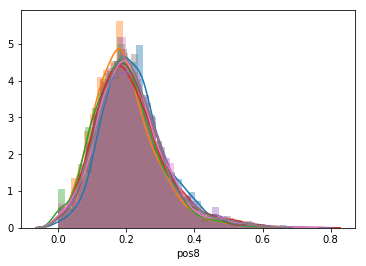

In [46]:
sns.distplot(nva.pos1)
sns.distplot(nva.pos2)
sns.distplot(nva.pos3)
sns.distplot(nva.pos4)
sns.distplot(nva.pos5)
sns.distplot(nva.pos6)
sns.distplot(nva.pos7)
sns.distplot(nva.pos8)


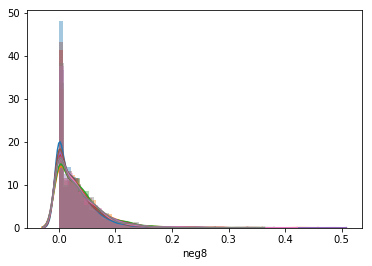

In [47]:
sns.distplot(nva.neg1)
sns.distplot(nva.neg2)
sns.distplot(nva.neg3)
sns.distplot(nva.neg4)
sns.distplot(nva.neg5)
sns.distplot(nva.neg6)
sns.distplot(nva.neg7)
sns.distplot(nva.neg8)

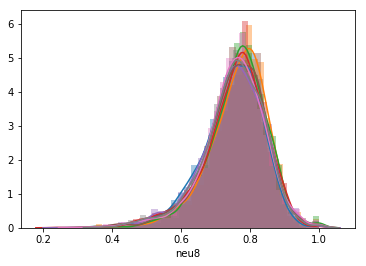

In [48]:
sns.distplot(nva.neu1)
sns.distplot(nva.neu2)
sns.distplot(nva.neu3)
sns.distplot(nva.neu4)
sns.distplot(nva.neu5)
sns.distplot(nva.neu6)
sns.distplot(nva.neu7)
sns.distplot(nva.neu8)

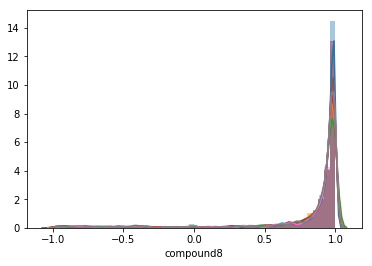

In [49]:
sns.distplot(nva.compound1)
sns.distplot(nva.compound2)
sns.distplot(nva.compound3)
sns.distplot(nva.compound4)
sns.distplot(nva.compound5)
sns.distplot(nva.compound6)
sns.distplot(nva.compound7)
sns.distplot(nva.compound8)


### Data Metrics Initial View

In [50]:
nva.describe()

,neg1,neu1,pos1,compound1,neg2,neu2,pos2,compound2,neg3,neu3,pos3,compound3,neg4,neu4,pos4,compound4,neg5,neu5,pos5,compound5,neg6,neu6,pos6,compound6,neg7,neu7,pos7,compound7,neg8,neu8,pos8,compound8,neg9,neu9,pos9,compound9,neg10,neu10,pos10,compound10,neg11,neu11,pos11,compound11,neg12,neu12,pos12,compound12,neg13,neu13,pos13,compound13,neg14,neu14,pos14,compound14,neg15,neu15,pos15,compound15,neg16,neu16,pos16,compound16,neg17,neu17,pos17,compound17,neg18,neu18,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.00000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.00000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,0.028496,0.747147,0.224374,0.875022,0.037357,0.766652,0.196014,0.788079,0.037471,0.764950,0.197598,0.768223,0.034050,0.755924,0.210026,0.810568,0.033141,0.751775,0.215089,0.823345,0.031445,0.757624,0.210931,0.832246,0.034209,0.755086,0.210712,0.812794,0.033955,0.753586,0.212449,0.826766,0.03589,0.756016,0.208096,0.802738,0.033430,0.752005,0.214566,0.818955,0.033517,0.752267,0.214202,0.826876,0.034987,0.749550,0.215453,0.810546,0.034474,0.754458,0.211078,0.79929,0.034063,0.756963,0.208978,0.798300,0.035475,0.748631,0.215889,0.808281,0.034494,0.750319,0.215188,0.808587,0.033667,0.755378,0.210964,0.792011,0.035179,0.747591,0.217223,0.793919,0.035462,0.750803,0.213735,0.794428,0.034320,0.746514,0.219188,0.818234
std,0.033607,0.090266,0.096683,0.296889,0.043246,0.087905,0.095282,0.430747,0.042815,0.086766,0.096218,0.454321,0.041874,0.092406,0.101909,0.399268,0.040923,0.093798,0.101538,0.381340,0.038276,0.089329,0.097149,0.359938,0.039995,0.091164,0.099254,0.396035,0.039718,0.090122,0.097108,0.368904,0.04507,0.092583,0.100279,0.396478,0.039221,0.094154,0.101479,0.377080,0.041379,0.090365,0.098923,0.370960,0.042646,0.089732,0.098310,0.396692,0.041648,0.094989,0.104453,0.41075,0.043106,0.091068,0.098931,0.411621,0.042142,0.094794,0.102621,0.400817,0.041315,0.096784,0.104112,0.391650,0.041672,0.096042,0.105275,0.425091,0.045944,0.098557,0.107862,0.413789,0.046262,0.094729,0.103926,0.424505,0.041618,0.091810,0.100924,0.380561
min,0.000000,0.331000,0.000000,-0.982100,0.000000,0.300000,0.000000,-0.991600,0.000000,0.313000,0.000000,-0.994200,0.000000,0.238000,0.000000,-0.988500,0.000000,0.262000,0.000000,-0.988000,0.000000,0.371000,0.000000,-0.991100,0.000000,0.302000,0.000000,-0.978000,0.000000,0.375000,0.000000,-0.963700,0.00000,0.348000,0.000000,-0.996100,0.000000,0.347000,0.000000,-0.990100,0.000000,0.320000,0.000000,-0.990500,0.000000,0.364000,0.000000,-0.990500,0.000000,0.278000,0.000000,-0.97400,0.000000,0.238000,0.000000,-0.991100,0.000000,0.256000,0.000000,-0.985300,0.000000,0.169000,0.000000,-0.987400,0.000000,0.357000,0.000000,-0.991000,0.000000,0.317000,0.000000,-0.991500,0.000000,0.250000,0.000000,-0.996100,0.000000,0.368000,0.000000,-0.989200
25%,0.000000,0.698000,0.160000,0.915000,0.000000,0.720000,0.131000,0.862200,0.000000,0.718000,0.132000,0.839600,0.000000,0.708000,0.141000,0.871800,0.000000,0.701000,0.147000,0.889700,0.000000,0.709000,0.144000,0.891000,0.000000,0.708000,0.144000,0.880700,0.000000,0.707000,0.149000,0.883400,0.00000,0.70

In [51]:
labels.describe()

count    1625.000000
mean        4.141538
std         0.323967
min         3.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [105]:
nva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 999
Data columns (total 81 columns):
price         1625 non-null object
neg1          1625 non-null float64
neu1          1625 non-null float64
pos1          1625 non-null float64
compound1     1625 non-null float64
neg2          1625 non-null float64
neu2          1625 non-null float64
pos2          1625 non-null float64
compound2     1625 non-null float64
neg3          1625 non-null float64
neu3          1625 non-null float64
pos3          1625 non-null float64
compound3     1625 non-null float64
neg4          1625 non-null float64
neu4          1625 non-null float64
pos4          1625 non-null float64
compound4     1625 non-null float64
neg5          1625 non-null float64
neu5          1625 non-null float64
pos5          1625 non-null float64
compound5     1625 non-null float64
neg6          1625 non-null float64
neu6          1625 non-null float64
pos6          1625 non-null float64
compound6     1625 non-null flo

In [98]:
labelspd = pd.DataFrame(labels)

In [54]:
labelspd.rating.value_counts()

4.0    948
4.5    525
3.5    107
5.0     33
3.0     12
Name: rating, dtype: int64

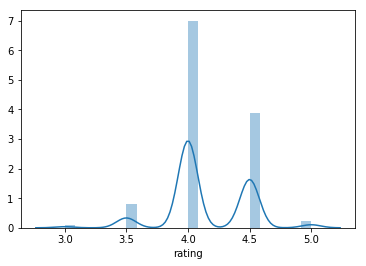

In [27]:
sns.distplot(labelspd.rating, kde='density')

In [108]:
labelspd.rating.value_counts()

0.0    1067
1.0     558
Name: rating, dtype: int64

In [107]:
nva.price.value_counts()

$$      1237
$        178
$$$      172
$$$$      38
Name: price, dtype: int64

In [56]:
type(nva)

pandas.core.frame.DataFrame

In [99]:
labelspd.rating = labelspd.rating.replace({3.0: 0, 5.0: 1, 3.5: 0, 4.0: 0, 4.5: 1})

In [100]:
labelspd.rating.value_counts()

0.0    1067
1.0     558
Name: rating, dtype: int64

In [101]:
pd.DataFrame(labelspd).to_csv('labels.csv')

In [102]:
nva.to_csv('vaderized2.csv')

## Prepping for Models

In [109]:
x = nva
y = labelspd

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [111]:
type(x_train),
type(y_train)

pandas.core.frame.DataFrame

In [62]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 461 to 283
Data columns (total 1 columns):
rating    1300 non-null float64
dtypes: float64(1)
memory usage: 20.3 KB


### Smoting

In [112]:
print(y.rating.value_counts()) #Previous original class distribution
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_sample(x_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0.0    1067
1.0     558
Name: rating, dtype: int64


ValueError: could not convert string to float: '$$'

## Helper Functions

In [29]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier 

### Confusion Matrix

In [ ]:

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    # Compute confusion matrix
    cmat = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix

plt.show()

In [ ]:
def plot_confusion_matrix1(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Metric Scores

In [38]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

### Feature Importance Graphs

In [39]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

## Modeling

### Dummy Classifier

In [40]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'uniform')
dummy.fit(x_train_resampled, y_train_resampled)
dummypred = dummy.predict(x_test)
print_metrics(y_test, dummypred)

Precision Score: 0.3273809523809524
Recall Score: 0.5188679245283019
Accuracy Score: 0.49538461538461537
F1 Score: 0.4014598540145986


### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
knnfit = knn.fit(x_train_resampled, y_train_resampled)
test_preds5 = knn.predict(x_test)
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds5)

Precision Score: 0.319672131147541
Recall Score: 0.36792452830188677
Accuracy Score: 0.5384615384615384
F1 Score: 0.34210526315789475


In [ ]:
plot_confusion_matrix1(cm =(y_test, test_preds5), normalize=False, target_names=['1','0'], title='KNN')

In [60]:
k_range = list(range(2, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train_resampled, y_train_resampled)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [61]:
grid.score(x_train_resampled, y_train_resampled)

1.0

In [62]:
grid.best_score_

0.71875

In [71]:
print(grid.best_params_)

{'n_neighbors': 2, 'weights': 'distance'}


In [63]:
grid.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [72]:
print(grid.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')


In [77]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')
knnfit = knn.fit(x_train_resampled, y_train_resampled)
test_preds5 = knn.predict(x_test)
print_metrics(y_test, test_preds5)

Precision Score: 0.3576158940397351
Recall Score: 0.5094339622641509
Accuracy Score: 0.5415384615384615
F1 Score: 0.42023346303501946


### Decision Trees

In [73]:
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train_resampled,y_train_resampled) 
dtree_pred = clf.predict(x_test)

In [74]:
print_metrics(y_test,dtree_pred)

Precision Score: 0.5081451168647202
Recall Score: 0.5089170328250194
Accuracy Score: 0.5415384615384615
F1 Score: 0.50526659923785


In [86]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64       219
         1.0       0.34      0.42      0.37       106

    accuracy                           0.54       325
   macro avg       0.51      0.51      0.51       325
weighted avg       0.57      0.54      0.55       325



In [ ]:
sample_split_range = list(range(1, 50))
param_grid = dict(min_samples_split=sample_split_range)
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train_resampled, y_train_resampled)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

### Regression Trees

In [76]:
#Regression Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 10, max_depth=7, min_samples_leaf = 2)
regressor.fit(x_train_resampled, y_train_resampled)
regtree_pred = regressor.predict(x_test)

In [77]:
print_metrics(y_test, regtree_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

### Bagged Tree

In [81]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
clf = bagged_tree.fit(x_train_resampled, y_train_resampled)
bagged_pred = bagged_tree.predict(x_test)

In [85]:
print(classification_report(y_test, bagged_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68       219
         1.0       0.38      0.44      0.41       106

    accuracy                           0.58       325
   macro avg       0.55      0.55      0.54       325
weighted avg       0.60      0.58      0.59       325



### Random Forests

In [83]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, max_leaf_nodes = 10)
forest.fit(x_train_resampled, y_train_resampled)

RFpred = forest.predict(x_test)
print(confusion_matrix(y_test, RFpred))
print(classification_report(y_test, RFpred))

[[150  69]
 [ 53  53]]
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       219
         1.0       0.43      0.50      0.46       106

    accuracy                           0.62       325
   macro avg       0.59      0.59      0.59       325
weighted avg       0.64      0.62      0.63       325



### AdaBoost and Gradient Boosting

In [87]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier(learning_rate =.02)


In [88]:
adaboost_clf.fit(x_train_resampled, y_train_resampled)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [89]:
gbt_clf.fit(x_train_resampled, y_train_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
adaboost_train_preds = adaboost_clf.predict(x_train_resampled)
adaboost_test_preds = adaboost_clf.predict(x_test)
gbt_clf_train_preds = gbt_clf.predict(x_train_resampled)
gbt_clf_test_preds = gbt_clf.predict(x_test)

In [91]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average = 'macro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train_resampled, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train_resampled, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7830188679245284
F1-Score: 0.7830176609650953

Model: Gradient Boosted Trees
Accuracy: 0.8248820754716981
F1-Score: 0.8244411055241704

Testing Metrics
Model: AdaBoost
Accuracy: 0.6
F1-Score: 0.5513718994223582

Model: Gradient Boosted Trees
Accuracy: 0.6338461538461538
F1-Score: 0.5955555555555556


In [92]:
print(classification_report(y_test, adaboost_test_preds))
print(classification_report(y_test, gbt_clf_test_preds))

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       219
         1.0       0.39      0.42      0.40       106

    accuracy                           0.60       325
   macro avg       0.55      0.55      0.55       325
weighted avg       0.61      0.60      0.60       325

              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72       219
         1.0       0.45      0.50      0.47       106

    accuracy                           0.63       325
   macro avg       0.59      0.60      0.60       325
weighted avg       0.65      0.63      0.64       325



### XGBoost

In [93]:
clf = xgb.XGBClassifier()
xgb = clf.fit(np.array(x_train_resampled), np.array(y_train_resampled))
training_preds = clf.predict(np.array(x_train_resampled))
xgb_preds = clf.predict(np.array(x_test))
training_accuracy = accuracy_score(np.array(y_train_resampled), training_preds)
val_accuracy = accuracy_score(np.array(y_test), xgb_preds)

In [94]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72       219
         1.0       0.42      0.42      0.42       106

    accuracy                           0.62       325
   macro avg       0.57      0.57      0.57       325
weighted avg       0.62      0.62      0.62       325



### SVM

In [99]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=4)
clf.fit(np.array(x_train_resampled), np.array(y_train_resampled))

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [100]:
svcy_pred = clf.predict(x_test)

In [101]:
print(classification_report(y_test,svcy_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.60      0.67       219
         1.0       0.43      0.63      0.51       106

    accuracy                           0.61       325
   macro avg       0.60      0.62      0.59       325
weighted avg       0.66      0.61      0.62       325

